In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
# Load the dataset
Baseball = pd.read_csv(r'C:\Users\ENVY\OneDrive\Documents\baseball.csv')

In [4]:
Baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [20]:
Baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [5]:
Baseball.info()
Baseball.isna().sum()
Baseball.shape
Baseball.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [6]:
Baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
Baseball['W']

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

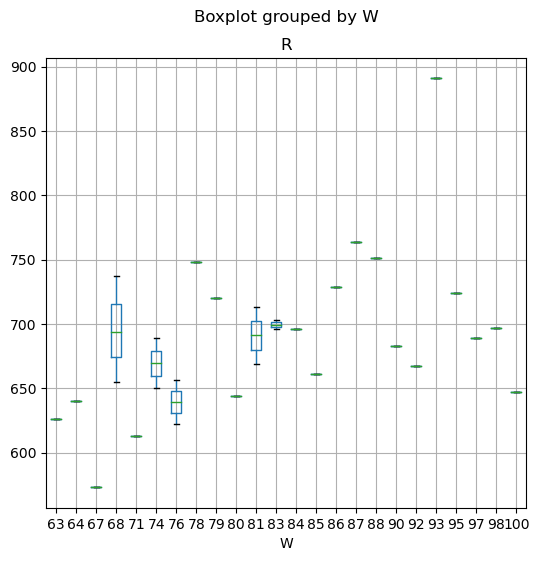

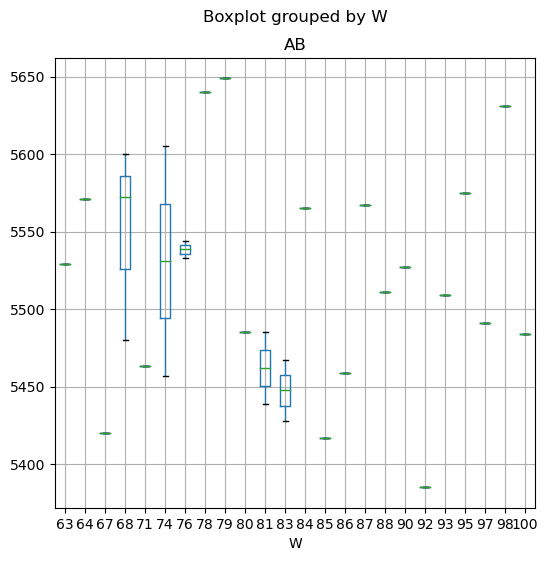

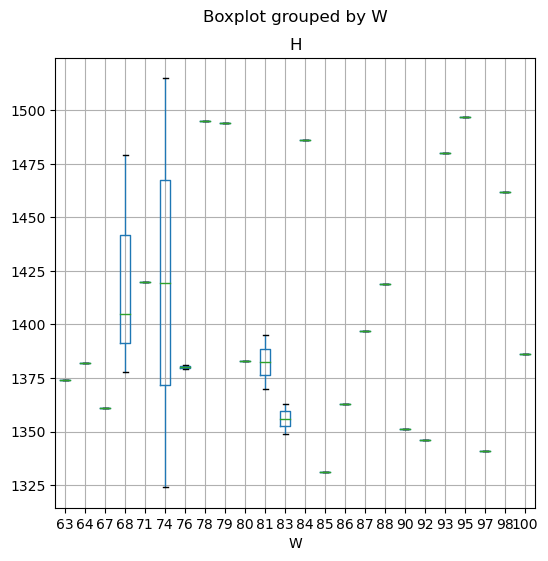

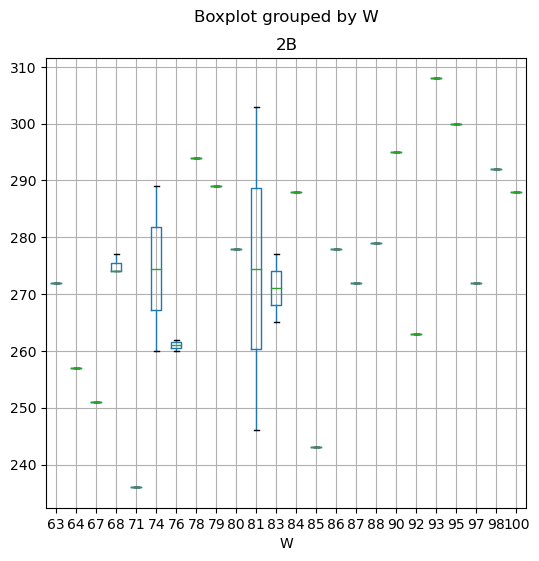

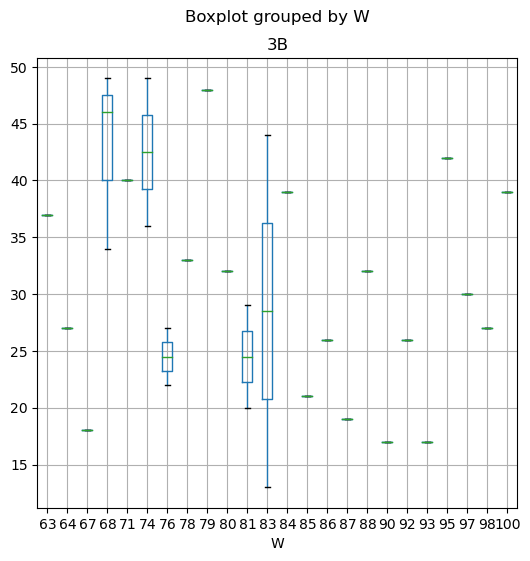

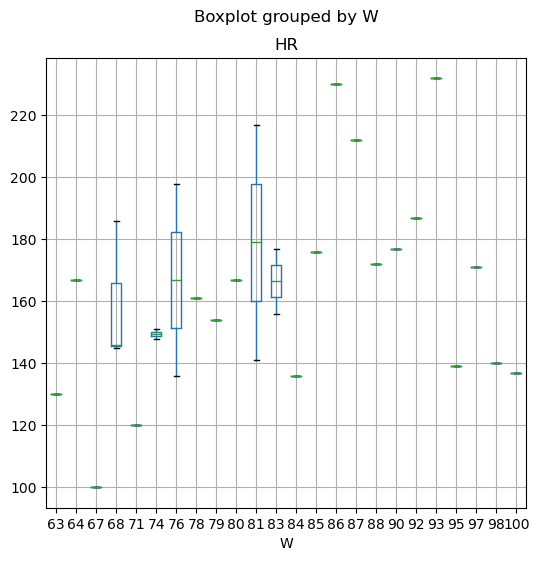

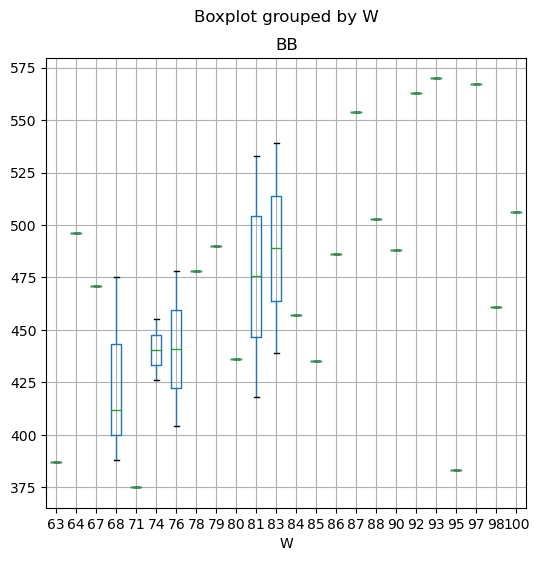

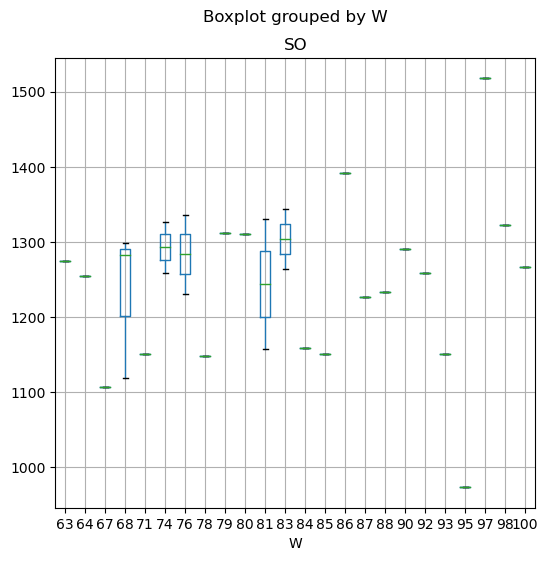

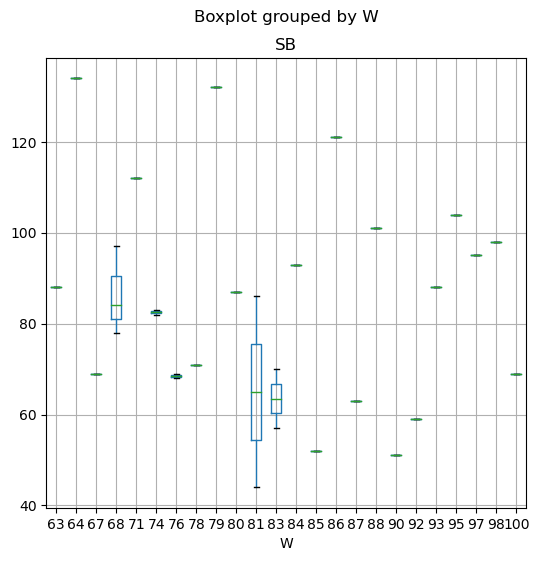

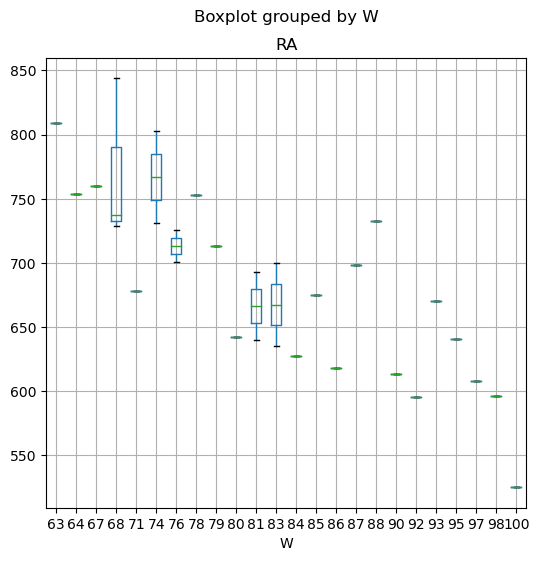

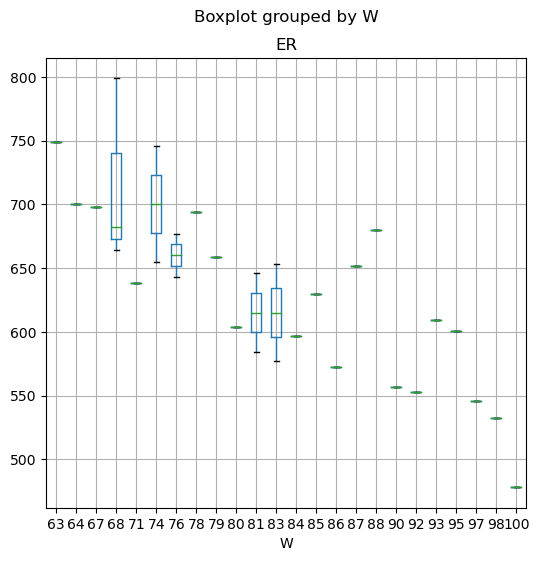

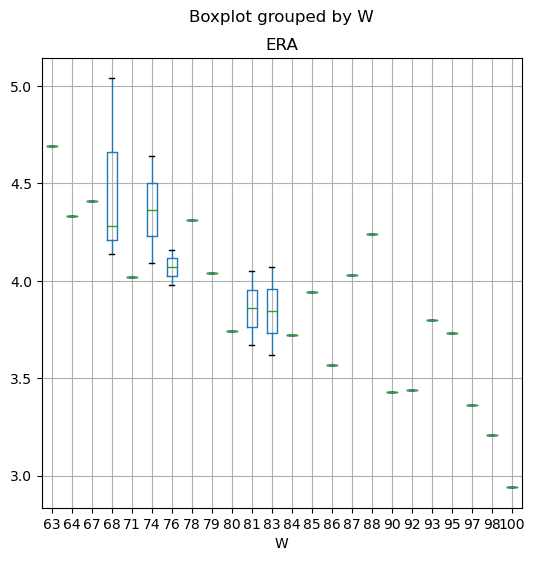

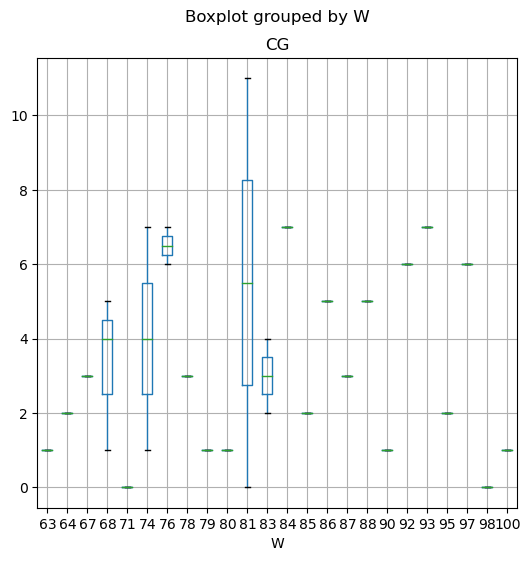

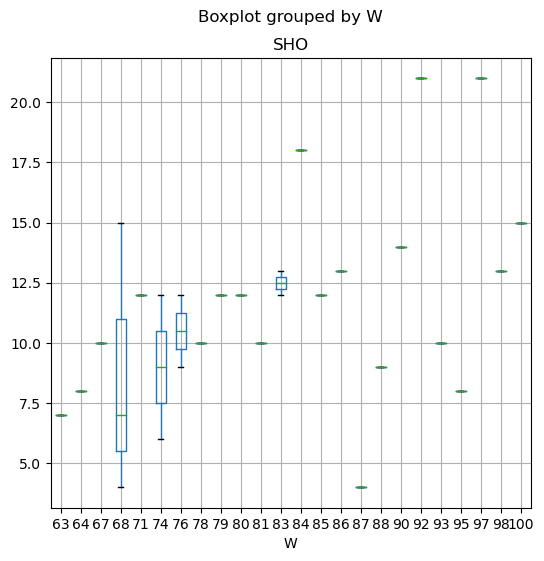

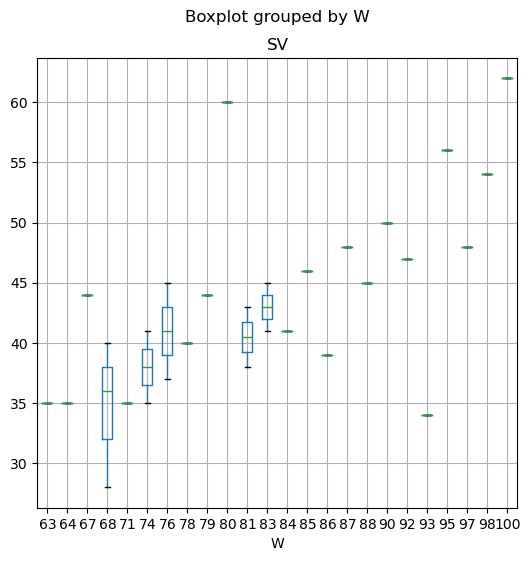

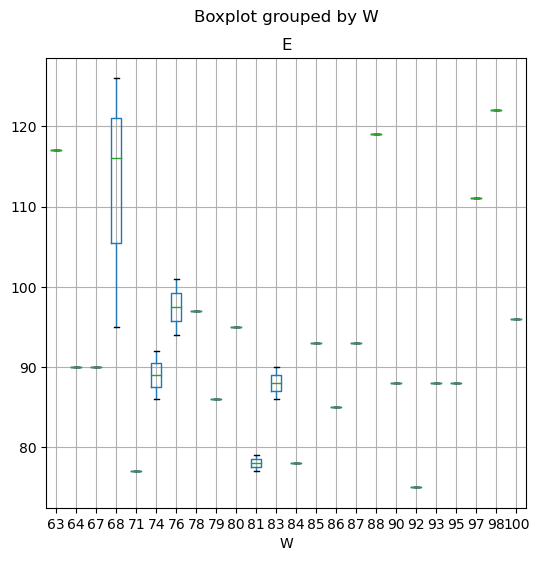

In [10]:
# Display boxplots
features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
for col in features:
    Baseball.boxplot(column=col, by='W', figsize=(6, 6))
    plt.title(col)
plt.show()

In [11]:
# Define the features and label
features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']
output = 'W'

X, y = Baseball[features].values, Baseball[output].values

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Check the distribution of classes in y
unique_classes, class_counts = np.unique(y, return_counts=True)

# Find the class with only one member
single_member_classes = unique_classes[class_counts == 1]

# Resample to ensure each class has at least two instances
for class_label in single_member_classes:
    # Find indices of the single-member class
    single_member_indices = np.where(y == class_label)[0]

    # Upsample the single-member class to have at least two instances
    y_resampled = resample([class_label] * 2, replace=True, n_samples=len(single_member_indices), random_state=42)

    # Replace the single-member class with the resampled data
    y[single_member_indices] = y_resampled

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Define the Column Transformer for feature scaling
feat_cols = [0, 1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15,16]
feature_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('preprocess', feature_transformer, feat_cols)])

# Different classifiers
classifiers = [
    LogisticRegression(C=1/0.01, solver='saga', multi_class='auto', max_iter=800),
    SVC(probability=True),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(max_features='auto'),
    GradientBoostingClassifier(max_features='auto')
]

In [12]:
# Fit different classifiers and evaluate performance
for clf in classifiers:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('clf', clf)])
    model = pipeline.fit(xtrain, ytrain)
    ympred = model.predict(xtest)
    
    # Print classifier details
    print(f"\n{clf.__class__.__name__}:")

C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



LogisticRegression:

SVC:

RandomForestClassifier:

KNeighborsClassifier:

DecisionTreeClassifier:


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anac


GradientBoostingClassifier:


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anacon

In [13]:
# Classification Report
print(classification_report(ytest, ympred))

              precision    recall  f1-score   support

           1       0.81      0.81      0.81        21
           2       0.80      0.87      0.83        23
           3       0.50      0.20      0.29         5
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         3
           7       0.82      1.00      0.90         9

    accuracy                           0.80        65
   macro avg       0.77      0.73      0.73        65
weighted avg       0.78      0.80      0.78        65



In [14]:
classifiers=[]

svm = SVC(probability=True)
classifiers.append(svm)

rf = RandomForestClassifier(n_estimators=100)
classifiers.append(rf)

knn = KNeighborsClassifier(n_neighbors=5)
classifiers.append(knn)

dt = DecisionTreeClassifier(max_features='auto')
classifiers.append(dt)

gbc = GradientBoostingClassifier(max_features= 'auto')
classifiers.append(gbc
                  )
feat_cols = [1,2,3,4,5,6,7,8]
feature_transformer = Pipeline( steps = [('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers= [('preprocess', feature_transformer, feat_cols)])

for clf in classifiers:
    pipeline= Pipeline(steps=[ ('preprocessor', preprocessor), ('clf', clf) ])
    model=pipeline.fit(xtrain, ytrain)
    ympred= model.predict(xtest)
    print(clf)
    print("Overall Accuracy:",accuracy_score(ytest, ympred))
    print("Overall Precision:",precision_score(ytest, ympred, average='macro'))
    print("Overall Recall:",recall_score(ytest, ympred, average='macro'))
    print("\n")

C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC(probability=True)
Overall Accuracy: 0.676923076923077
Overall Precision: 0.6568670792808724
Overall Recall: 0.5153554175293306


RandomForestClassifier()
Overall Accuracy: 0.7692307692307693
Overall Precision: 0.6723232323232323
Overall Recall: 0.6550839659535311


KNeighborsClassifier()
Overall Accuracy: 0.7076923076923077
Overall Precision: 0.6549002849002848
Overall Recall: 0.5523924545663677


DecisionTreeClassifier(max_features='auto')
Overall Accuracy: 0.6615384615384615
Overall Precision: 0.7282252348041821
Overall Recall: 0.5899585921325052




C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anac

GradientBoostingClassifier(max_features='auto')
Overall Accuracy: 0.7384615384615385
Overall Precision: 0.5239898989898989
Overall Recall: 0.5552449965493443




C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\ENVY\anacon

In [15]:
# Overall Accuracy, Precision, and Recall
print("Overall Accuracy:", accuracy_score(ytest, ympred))
print("Overall Precision:", precision_score(ytest, ympred, average='macro'))
print("Overall Recall:", recall_score(ytest, ympred, average='macro'))

Overall Accuracy: 0.7384615384615385
Overall Precision: 0.5239898989898989
Overall Recall: 0.5552449965493443


C:\Users\ENVY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
 # Confusion Matrix
mcm = confusion_matrix(ytest, ympred)
print("Confusion Matrix:")
print(mcm)

Confusion Matrix:
[[16  3  2  0  0  0]
 [ 1 20  0  1  0  1]
 [ 4  0  1  0  0  0]
 [ 0  1  0  2  0  1]
 [ 1  0  0  1  0  1]
 [ 0  0  0  0  0  9]]
